# EDA on Beauty & Cosmetic Products

# Project Overview

### This project analyzes beauty product data using Python, Pandas, Matplotlib, and Seaborn to uncover key trends and patterns.



Key Problems Solved:
- Skewed Price Distribution – Applied log transformation for better analysis.
- Price vs. Reviews – Examined if expensive products get more customer engagement.
- Reliable Brand Ratings – Filtered brands to exclude those with few reviews.
- Popular Product Categories – Identified top-selling beauty segments.
- Customer Satisfaction by Category – Analyzed top-rated product categories to highlight quality trends.
- Skin Type Preferences – Grouped less common skin types for clarity.
- Cruelty-Free Trends – Analyzed the share of ethical beauty products.

### Mounting Google drive to colab for file access

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DATA UNDERSTANDING & CLEANING

In [ ]:
import pandas as pd

### Adding the file to a file_path variable

In [ ]:
file_path="/content/drive/My Drive/Beauty.csv"

###Adding the file_path to the dataframe

In [ ]:
df=pd.read_csv(file_path)

### Using head function to see top 5 data from the dataset.

In [ ]:
df.head()

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,Ultra Face Mask,Drunk Elephant,Blush,Weekly,67.85,1.4,686,30ml,Sensitive,Female,Tube,Retinol,False,Australia
1,Ultra Lipstick,Laura Mercier,Makeup Remover,Occasional,116.43,4.2,5483,250ml,Dry,Unisex,Bottle,Shea Butter,False,UK
2,Ultra Serum,Natasha Denona,Highlighter,Daily,90.84,1.6,5039,100ml,Sensitive,Male,Compact,Aloe Vera,True,Italy
3,Divine Serum,Ilia Beauty,Face Mask,Occasional,55.17,3.2,6202,250ml,Normal,Male,Tube,Glycerin,True,South Korea
4,Super Foundation,Charlotte Tilbury,Highlighter,Occasional,140.56,1.7,297,100ml,Oily,Female,Compact,Glycerin,False,Germany


###Checking the number of rows and columns.

In [ ]:
df.shape

(15000, 14)

###A brief info of the columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Product_Name       15000 non-null  object 
 1   Brand              15000 non-null  object 
 2   Category           15000 non-null  object 
 3   Usage_Frequency    15000 non-null  object 
 4   Price_USD          15000 non-null  float64
 5   Rating             15000 non-null  float64
 6   Number_of_Reviews  15000 non-null  int64  
 7   Product_Size       15000 non-null  object 
 8   Skin_Type          15000 non-null  object 
 9   Gender_Target      15000 non-null  object 
 10  Packaging_Type     15000 non-null  object 
 11  Main_Ingredient    15000 non-null  object 
 12  Cruelty_Free       15000 non-null  bool   
 13  Country_of_Origin  15000 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(10)
memory usage: 1.5+ MB


### Checking Null Values

In [ ]:
df.isnull()

,Product_Name,Brand,Category,Usage_Frequency,Price_USD,Rating,Number_of_Reviews,Product_Size,Skin_Type,Gender_Target,Packaging_Type,Main_Ingredient,Cruelty_Free,Country_of_Origin
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
14998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Summing of the null values if exists.

In [ ]:
df.isnull().sum()

,0
Product_Name,0
Brand,0
Category,0
Usage_Frequency,0
Price_USD,0
Rating,0
Number_of_Reviews,0
Product_Size,0
Skin_Type,0
Gender_Target,0


### Altering datatypes for better outcomes in graphical representation

In [ ]:
df['Cruelty_Free']= df['Cruelty_Free'].astype(int)

In [ ]:
df['Cruelty_Free'].dtype

dtype('int64')

In [ ]:
df['Price_USD']= df['Price_USD'].astype(int)

In [ ]:
df['Price_USD'].dtype

dtype('int64')

### Checking Delicacy

In [ ]:
duplicated_rows=df.duplicated().sum()
print(duplicated_rows)

0


### Graphical Representation of the data.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")

## 1. Log Transformation for Price Distribution

### Problem:

Raw price data is highly skewed due to a few very expensive products.

Hard to see patterns in the price range.

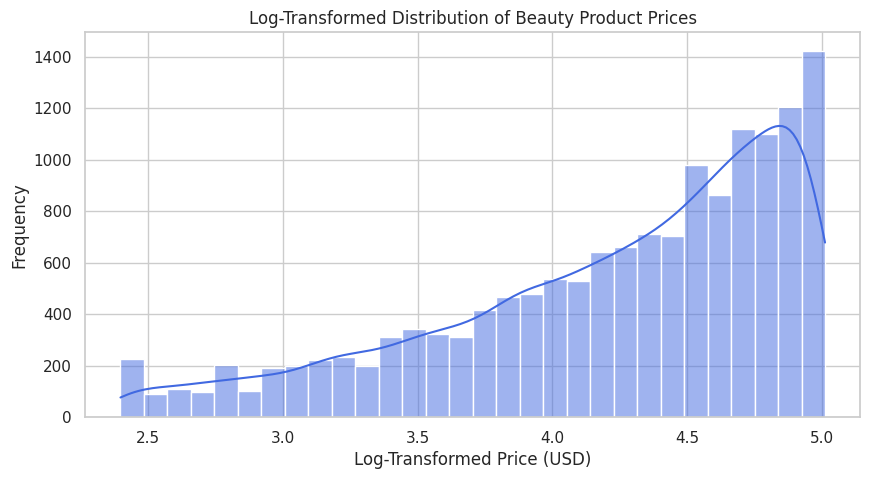

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(df["Price_USD"]), bins=30, kde=True, color="royalblue")
plt.xlabel("Log-Transformed Price (USD)")
plt.ylabel("Frequency")
plt.title("Log-Transformed Distribution of Beauty Product Prices")
plt.show()


### Insight:

Log transformation makes the distribution more normal.

Most beauty products are in the affordable to mid-range price bracket.

Expensive products are rare but exist in the dataset.

## 2. Price vs. Number of Reviews (Scatter Plot with Regression)

### Problem:

Identifying the relationship between product price and customer engagement.

Some high-end products might have very few reviews, making trend detection difficult.

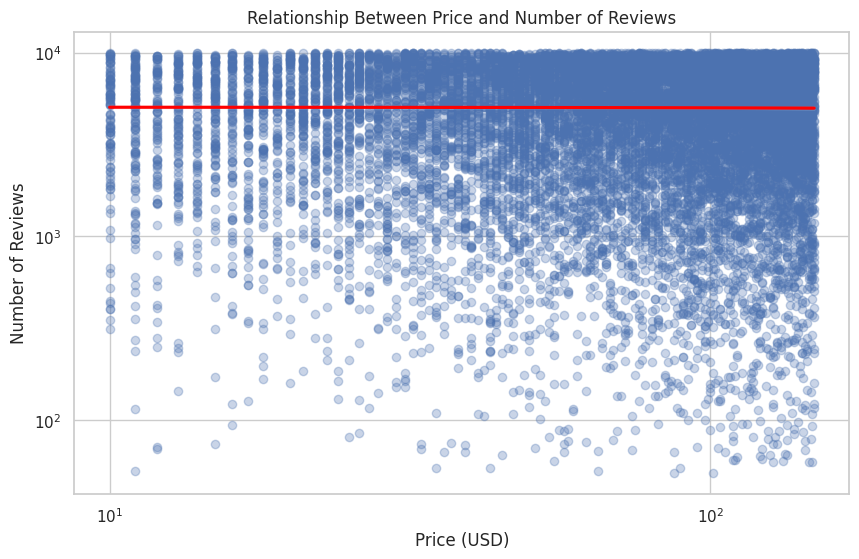

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df["Price_USD"], y=df["Number_of_Reviews"], scatter_kws={"alpha": 0.3}, line_kws={"color": "red"})
plt.xlabel("Price (USD)")
plt.ylabel("Number of Reviews")
plt.title("Relationship Between Price and Number of Reviews")
plt.yscale("log")
plt.xscale("log")
plt.show()


### Insight:

No strong correlation between price and the number of reviews.

Some lower-priced products have high reviews, likely due to affordability and popularity.

Log transformation of axes makes trends more visible.

## 3. Top 10 Highest Rated Beauty Brands (Filtered by Review Count)


### Problem:

Some brands might have high ratings but very few reviews, making them unreliable.

Identifying genuinely well-rated brands with enough customer feedback.

<ipython-input-36-3260f3f3c32d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands_refined["Rating"], y=top_brands_refined.index, palette="viridis")


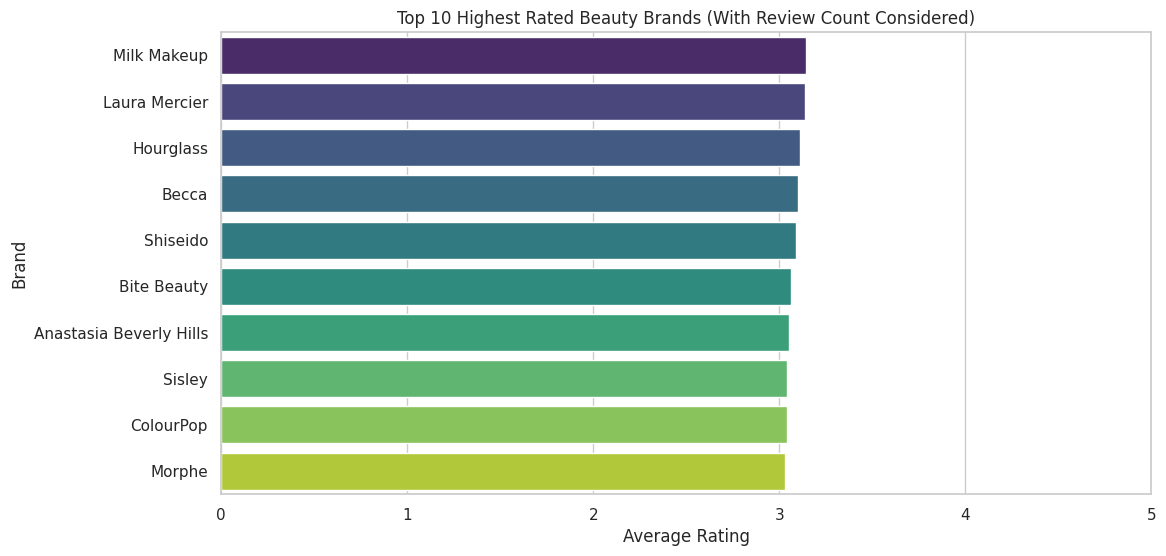

In [ ]:
brand_review_threshold = df.groupby("Brand").filter(lambda x: x["Number_of_Reviews"].sum() > 500)

top_brands_refined = brand_review_threshold.groupby("Brand").agg({"Rating": "mean", "Number_of_Reviews": "sum"})
top_brands_refined = top_brands_refined.sort_values(by="Rating", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_brands_refined["Rating"], y=top_brands_refined.index, palette="viridis")
plt.xlabel("Average Rating")
plt.ylabel("Brand")
plt.title("Top 10 Highest Rated Beauty Brands (With Review Count Considered)")
plt.xlim(0, 5)
plt.show()


### Insight:

Brands with a large number of reviews and high ratings are more trustworthy.

Top brands have an average rating close to 4.5–5.

Lesser-known brands might still have good ratings but need more reviews to be considered reliable.

## 4. Top 10 Most Popular Beauty Product Categories

## Problem:

Understanding which beauty categories have the most product variety.

Helping businesses focus on trending categories.

<ipython-input-37-cf1c654cfa3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.values, y=category_counts.index, palette="coolwarm")


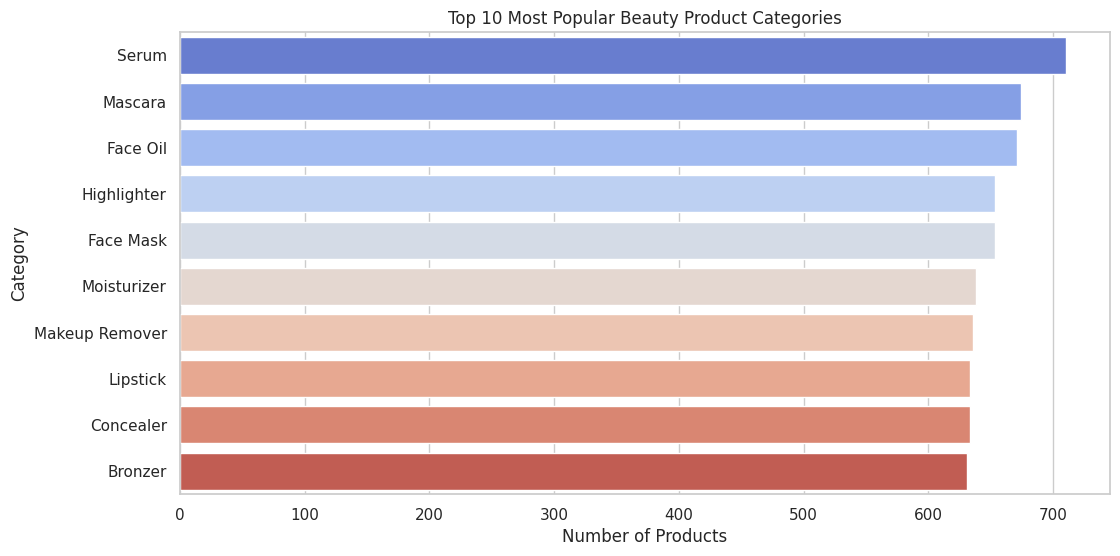

In [ ]:
category_counts = df["Category"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.values, y=category_counts.index, palette="coolwarm")
plt.xlabel("Number of Products")
plt.ylabel("Category")
plt.title("Top 10 Most Popular Beauty Product Categories")
plt.show()

### Insight:

Some categories (like skincare and makeup) dominate the market.

Niche categories exist but are less common.

Helps identify demand trends in beauty product types.

## 5. Skin Type Preferences (Grouped Pie Chart)

### Problem:

Too many skin types can clutter the visualization.

Understanding which skin types have the most targeted products.

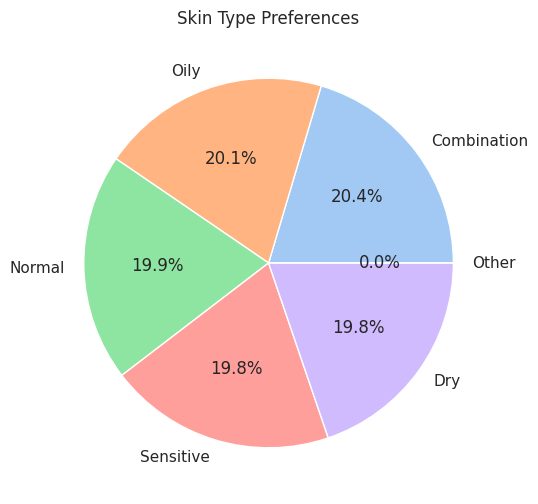

In [ ]:
skin_counts = df['Skin_Type'].value_counts()
other_skin_types = skin_counts[skin_counts < skin_counts.max() * 0.1].sum()
skin_counts = skin_counts[skin_counts >= skin_counts.max() * 0.1]
skin_counts['Other'] = other_skin_types
plt.figure(figsize=(6, 6))
plt.pie(skin_counts, labels=skin_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Skin Type Preferences')
plt.show()


### Insight:

Normal, oily, and sensitive skin types have the most products.

Less common skin types are grouped under "Other" for clarity.

Helps brands understand consumer preferences in skincare.


## 6. Cruelty-Free vs. Non-Cruelty-Free Products (Pie Chart)

### Problem:

Understanding how many products are cruelty-free.

Helps ethical consumers and businesses make informed decisions.

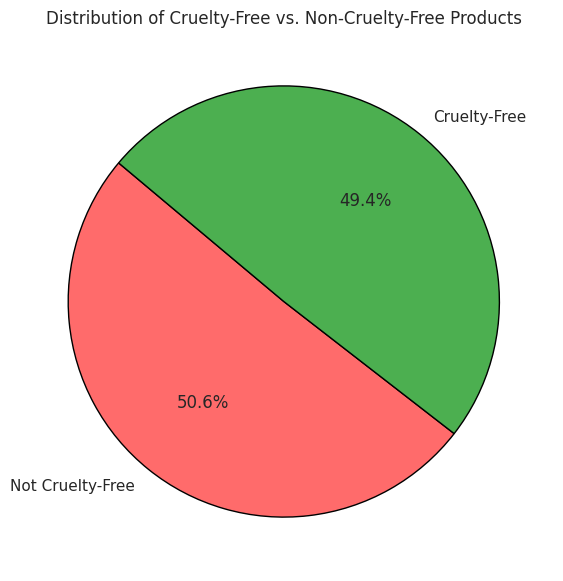

In [ ]:

cruelty_counts = df["Cruelty_Free"].value_counts()

colors = ["#FF6B6B", "#4CAF50"]


plt.figure(figsize=(7, 7))
plt.pie(cruelty_counts, labels=["Not Cruelty-Free", "Cruelty-Free"], autopct="%1.1f%%",
        colors=colors, startangle=140, wedgeprops={"edgecolor": "black"})
plt.title("Distribution of Cruelty-Free vs. Non-Cruelty-Free Products")
plt.show()


### Insight:

Majority of products may or may not be cruelty-free (exact insight depends on the data).

Growing trend towards cruelty-free beauty.

Useful for ethical branding strategies.


## 7. Top 10 Beauty Product Categories by Average Rating

### Problem:
Some categories may have a high number of products but lower customer satisfaction.

Identifying which categories consistently receive high ratings can help businesses focus on quality.

<ipython-input-42-03c2663d2221>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_ratings.values, y=category_ratings.index, palette="coolwarm")


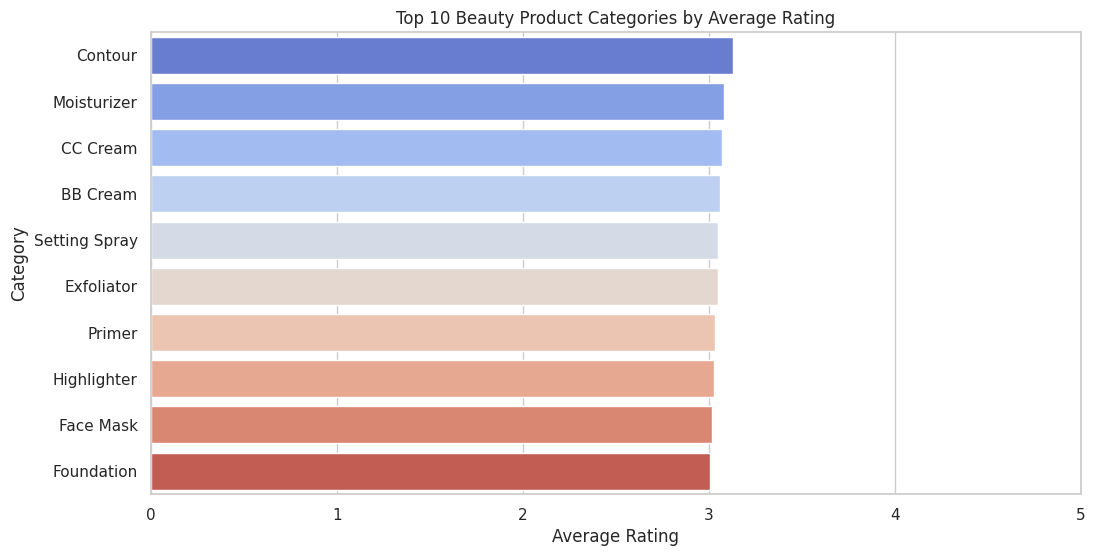

In [ ]:
category_ratings = df.groupby("Category")["Rating"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_ratings.values, y=category_ratings.index, palette="coolwarm")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.title("Top 10 Beauty Product Categories by Average Rating")
plt.xlim(0, 5)
plt.show()



### Insight:
Certain categories tend to have higher customer satisfaction, possibly due to product effectiveness.

Categories with lower ratings may indicate issues with quality, pricing, or performance expectations.

Helps businesses understand which product types perform best in terms of customer feedback.

#Conclusion

Our EDA on beauty products uncovered key trends in pricing, customer engagement, and product quality.

Key Findings:
- Most products are affordable to mid-range, with fewer premium-priced items.
- Price does not strongly influence the number of reviews—affordable products often get more engagement.
- Highly-rated brands tend to have a large number of reviews, making them more reliable.
- Skincare and makeup dominate the market, while niche categories have fewer products.
- Certain categories consistently receive higher ratings, indicating better customer satisfaction.
- Normal, oily, and sensitive skin types have the most product availability.
- A significant share of the market is moving towards cruelty-free beauty products.

##Recommendations:

- Brands should focus on affordability—lower-priced products attract more engagement.
- Invest in high-rated product categories to maintain customer satisfaction and trust.
- Expand product ranges for underrepresented skin types to capture niche audiences.
- Enhance quality in lower-rated categories to improve customer perception.
- Ethical branding is a strong selling point—invest in cruelty-free formulations.